In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm

INPUT_SIZE = 28 * 28
HIDDEN_1_SIZE = 300
HIDDEN_2_SIZE = 100
OUTPUT_SIZE = 10
BATCH_SIZE = 32
EPOCH_NUM = 4

# 标准化、归一化
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])]
)

train_set = torchvision.datasets.MNIST(root='./data', download=True, transform=transform)

test_set = torchvision.datasets.MNIST(root='./data', download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, num_workers=2)

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images[0])
print(images.shape)

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 24 * 24 , 10)
        #self.bn1 = nn.BatchNorm1d(HIDDEN_1_SIZE)
        #self.fc2 = nn.Linear(HIDDEN_1_SIZE, HIDDEN_2_SIZE)
        #self.bn2 = nn.BatchNorm1d(HIDDEN_2_SIZE)
        #self.fc3 = nn.Linear(HIDDEN_2_SIZE, OUTPUT_SIZE)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)

        x = x.view(-1, 16*24*24)

        x = self.fc1(x)
        x = F.relu(x)

        return x

net = CNN().cuda()
print(net)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=10, bias=True)
)


In [3]:
criterion = nn.CrossEntropyLoss()

# lr 如何设置 momentum
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)

In [7]:
train_loss_hist = []
test_loss_hist = []

for epoch in tqdm(range(EPOCH_NUM)):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        #print(images.shape)
        outputs = net(images)
        print("outputs ")
        print(outputs)
        print("labels ")
        print(labels)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if(i % 250 == 0):
            with torch.no_grad():
                for test_data in testloader:
                    test_images, test_labels = test_data
                    test_images = test_images.cuda()
                    test_labels = test_labels.cuda()
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
            
            train_loss_hist.append(running_loss / 250)
            test_loss_hist.append(test_loss.item())
            running_loss = 0.0

        if(i % 1000 == 0):
            print('step: %d loss: %.3f' % (i, loss))

0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.7072],
        [ 0.0000,  0.0000,  0.0000,  0.3941,  0.0000,  8.2863,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          5.4281,  0.0000],
        [ 0.0000,  5.4598,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3482,  9.6024,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  3.8070,  0.0000,  0.0000,
          7.1407,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.2839,  0.0000,  5.2365,  0.0000,  0.0000,
         10.5726,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0

KeyboardInterrupt: 

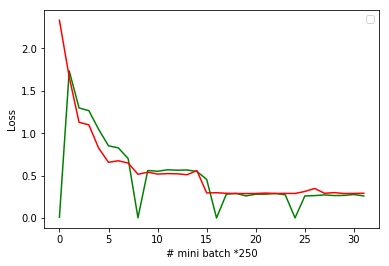

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss_hist, color='green')
plt.plot(test_loss_hist, color='red')
plt.legend('train_loss', 'test_loss')
plt.xlabel('# mini batch *250')
plt.ylabel('Loss')

In [19]:
# 测试模型

correct = 0.0
total = 0.0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        correct += (predicted == labels).sum()
        total += labels.size(0)
    
print('准确率：', float(correct) / total)

准确率： 0.8929333333333334


In [ ]:
# 准确率： 0.8929333333333334